In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
cctv = pd.read_csv('data-files/a.cctv-in-seoul.csv')

In [3]:
cctv.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [4]:
# print(cctv.columns)
print(list(cctv.columns))
# print(cctv.index)
print(list(cctv.index))

['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [5]:
cctv.columns = list('abcdef')
cctv.columns = ['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
cctv.head(2)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377


In [6]:
# cctv.rename(columns={"변경전컬럼이름":"변경후컬럼이름",}) #부분적 변경할때만 사용
cctv.rename(columns={"기관명":"구별"}, inplace = True)  #inplace : 원본을 변경시켜준다.
cctv.head(2) 

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377


In [7]:
cctv.sort_values(by='소계', ascending=False).head(3)   #소계 기준으로 정렬.


,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398


In [8]:
a = cctv.iloc[:,3:].sum(axis=1)    # 최근 3년 합계(2014년~2016년 구별 합계). 구 - index지정 안함.
b = cctv.iloc[:, 2]  # 과거 4년 이전의 설치된 cctv
cctv['최근증가율'] = a / b * 100   # *100 하면 %로~ 
cctv.sort_values( by='최근증가율', ascending=False).head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# pd.read_excel('data-files/a.population-in-seoul.xls')
pop_in_seoil = pd.read_excel('data-files/a.population-in-seoul.xls',
                              header = 2,
                              usecols='B, D, G, J, N')

In [11]:
pop_in_seoil.head(3)
pop_in_seoil.tail(3) 
pop_in_seoil = pop_in_seoil.iloc[1:-1]
pop_in_seoil

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [12]:
pop_in_seoil2 = pop_in_seoil.copy()

In [13]:
# pop_in_seoil.columns = ['구별', '인구수' , '한국인' ,'외국인', '고령자']
# pop_in_seoil.head(3)
names = ['구별', '인구수' , '한국인' ,'외국인', '고령자']
pop_in_seoil.rename(columns={p:n for p, n in zip(pop_in_seoil.columns, names)},    # zip 함수 이용
                     inplace=True)
pop_in_seoil.head(3)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0


In [14]:
pop_in_seoil['구별'].unique()  
# unique:혹시 중복되는 데이터가 있으면 제거하고 한번씩만 가져오도록 만들어 준다.
pop_in_seoil['구별'].value_counts()  


종로구     1
강남구     1
양천구     1
서초구     1
송파구     1
동작구     1
관악구     1
금천구     1
서대문구    1
은평구     1
마포구     1
영등포구    1
노원구     1
용산구     1
구로구     1
중구      1
중랑구     1
성북구     1
성동구     1
강서구     1
강북구     1
도봉구     1
강동구     1
동대문구    1
광진구     1
Name: 구별, dtype: int64

In [15]:
pop_in_seoil['외국인비율'] = pop_in_seoil['외국인'] / pop_in_seoil['인구수'] *100
pop_in_seoil['고령자비율'] = pop_in_seoil['고령자'] / pop_in_seoil['인구수'] *100
pop_in_seoil.sort_values(by='외국인비율', ascending=False)
# pop_in_seoil.sort_values(by='고령자비율', ascending=False)
# pop_in_seoil.sort_values(by='인구수', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [16]:
pop_in_seoil.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [17]:
cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [18]:
# print(cctv["구별"].sort_values()) 
# print(pop_in_seoil["구별"].sort_values())

In [19]:
# pdandas.merge : 두 테이블을 병합하는 함수 (같은 이름의 컬럼을 기준으로 병합.)
# merged_data = pd.merge(cctv, pop_in_seoil)
merged_data = pd.merge(cctv, pop_in_seoil, on='구별')

In [20]:
merged_data.head()
# merged_data.shape   # 25행 13열 이라고 뜬다.

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [21]:
# del merged_data(['2014년']) 이렇게 하나하나 지우는 방법이 있고..
# merged_data.drop(['2013년도 이전','2014년','2015년','2016년'],axis=1, inplace=True).head(3)
merged_data = merged_data.iloc[:, [0, 1, *range(6,13)]]    # 여기서 데이터 설정 되는 것! 주의!
# 호출할때 *을 부르면 해체 / def 함수에서 *을 정의 할때 쓰면 병합 

In [22]:
merged_data.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [23]:
# set_index : 지정된 컬럼을 인덱스로 사용
merged_data.set_index('구별', inplace =True)

In [24]:
merged_data.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [25]:
# reset_index : 인덱스 컬럼을 일반 컬럼으로 변경
merged_data.reset_index().head(3)  #원본수정 하려면 마찬가지로 inplace=True 사용할면 된다.

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


In [26]:
merged_data.sort_values('소계',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [27]:
merged_data.sort_values('인구수',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [28]:
try : 
    del merged_data['인구당비율']
except :
    pass

try : 
    del merged_data['CCTV비율']
except :
    pass

merged_data['CCTV당인구'] = merged_data['인구수'] / merged_data['소계']

In [29]:
merged_data.sort_values(by='CCTV당인구', ascending=True).head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV당인구
구별,,,,,,,,,
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,150.371305
종로구,1002,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,162.495010
중구,671,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,198.569300


In [30]:
plt.rc('font', family='NanumBarunGothic')
print(plt.rcParams['font.family'])

['NanumBarunGothic']


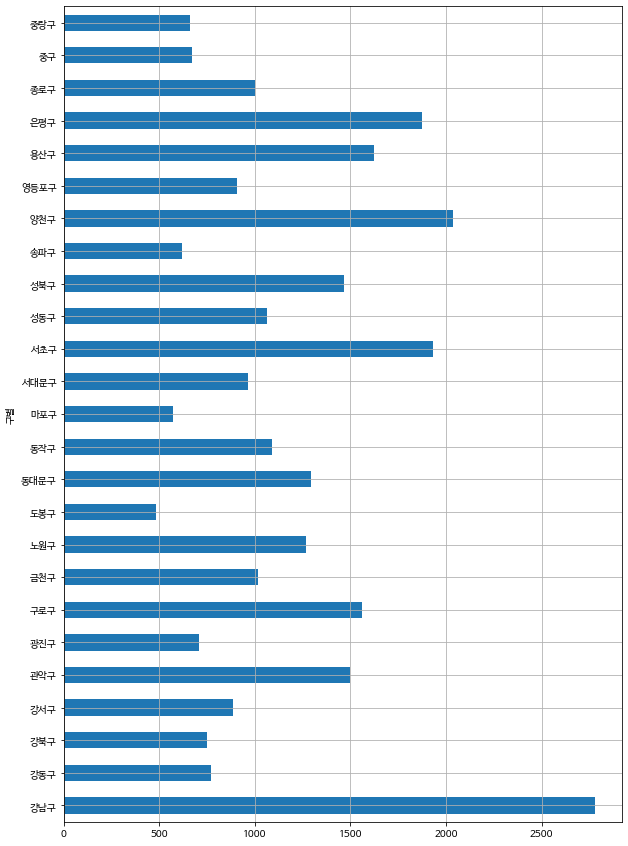

In [31]:
merged_data['소계'].plot(kind="barh", grid=True, figsize = (10, 15))
plt.show()

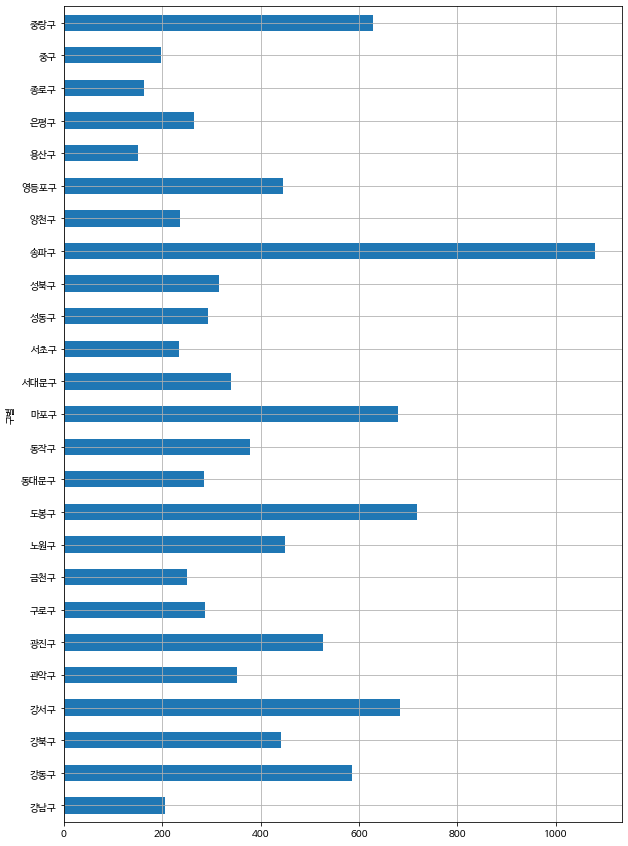

In [32]:
merged_data['CCTV당인구'].plot(kind="barh", grid=True, figsize = (10, 15))
plt.show() 